# Tensorflow CNN AlexNet tested with MNIST dataset
#### Created by Zhongtao Yang.
Thanks to the tutorial from Morvan

### This example shows how to use tensorflow to learn a simple linear function

In [11]:
import tensorflow as tf
import numpy as np
import time

t = time.time()
# create data
x_data = np.random.rand(1000).astype(np.float)
y_data = x_data * 7.1 + 10.23

#  create tensfowflow structure
Weights = tf.Variable(tf.random_uniform([1], -1.0, 1.0)) # size is one element, range from -1 to 1
biases = tf.Variable(tf.zeros([1]))

y = Weights * x_data + biases
loss = tf.reduce_mean(tf.square(y-y_data)) #define the loss
optimizer = tf.train.GradientDescentOptimizer(0.5) # construct an optimizer e.g: use tensorflow's gradient descent optmizer with learning rate 0.5
train = optimizer.minimize(loss) # trainier based on the constructed optimizer, and specify it by optmizing loss we defined


init = tf.initialize_all_variables() #to be able to execute on all the tf variables, we need to initialize all variables
# structured finished

# define a session (must use a session to let the tensor flow!)
sess = tf.Session() #session is a class so capitalize S
sess.run(init) #always remember to initialize variable
for step in range(1000):
    sess.run(train)
    if step % 200 == 0:
        print "step:", step, sess.run(Weights)[0], sess.run(biases)[0] #session.run goes to execute command or access variables
        print "loss:",sess.run(loss),'\n'

print "proccessing time:",time.time()-t

step: 0 7.42899 13.9024
loss: 14.7411 

step: 200 7.1 10.23
loss: 1.74987e-12 

step: 400 7.1 10.23
loss: 1.74987e-12 

step: 600 7.1 10.23
loss: 1.74987e-12 

step: 800 7.1 10.23
loss: 1.74987e-12 

proccessing time: 0.361482143402


### This example shows how to use tensorflow to calculate matrix multiplication

In [13]:
import tensorflow as tf
matrix1 = tf.constant([[3,3]], name='matrix1', dtype='float')
matrix2 = tf.constant([[3],[2]], name='matrix2', dtype='float')
product = tf.matmul(matrix1, matrix2)

# # method 1
# sess = tf.Session()
# result = sess.run(product)
# print result
# sess.close() # it is not necessary

# method 2
with tf.Session() as sess: #with session open and named with sess, it will be close automatically after finished
    print 'The product is:',sess.run(product)[0][0]
    

The product is: 15.0


### Working on tensorflow variable

In [14]:
import tensorflow as tf
state = tf.Variable(0, name='counter')
# print state.name
one = tf.constant(1)
new_value = tf.add(state, one)
update = tf.assign(state,new_value)

init = tf.initialize_all_variables()
with tf.Session() as sess:
    sess.run(init)
    for _ in range(3):
        sess.run(update) #it will run new_value line and then assign to state
        print sess.run(state)

1
2
3


### Placeholder
it is used to work as a data container, and can be fed with different data everytime

In [18]:
import tensorflow as tf

input1 = tf.placeholder(tf.float32) #usually float32 for float
input2 = tf.placeholder(tf.float32)
output =  tf.mul(input1, input2)

with tf.Session() as sess:
    print 'result is:',(sess.run(output,feed_dict={input1:[10], input2:[11]})[0])#it is a dict| #Feeding data when run output=tf.mul's input1 and input2 

result is: 110.0


### Activation functions e.g Relu, sigmoid
tf activation functions:
https://www.tensorflow.org/versionselu/r0.elu10/api_docs/python/nn.html

### Define and add fully connected layers
This can be used as a function to add new layers (fully connected layer)

In [21]:
import tensorflow as tf

def add_layer(inputs, input_size, output_size, activation_function=None):
    Weights = tf.Variable(tf.random_normal([input_size, output_size],dtype='float')) #initialize weights variable with random normal
    biases = tf.Variable(tf.zeros([1,output_size]) + 0.1) #better then be all 0's
    Wx_plus_b = tf.add(tf.matmul(inputs, Weights),biases)
    if activation_function is None:
        output = Wx_plus_b
    else:
        output = activation_function(Wx_plus_b)
    return output

### Build neural network (need lecture 10 code)

In [24]:
import tensorflow as tf
import numpy as np
def add_layer(inputs, input_size, output_size, activation_function=None):
    Weights = tf.Variable(tf.random_normal([input_size, output_size]))
    biases = tf.Variable(tf.zeros([1,output_size]) + 0.1) #better then be all 0's
    Wx_plus_b = tf.add(tf.matmul(inputs, Weights), biases)
    if activation_function is None:
        output = Wx_plus_b
    else:
        output = activation_function(Wx_plus_b)
    return output


x_data = np.linspace(-1, 1, 300,dtype='float32')[:, np.newaxis] #np.newaxis can be used to increase dimention of ndarray
noise = np.random.normal(0,0.05,x_data.shape)
y_data = np.square(x_data) - 0.5 + noise

xs = tf.placeholder(tf.float32,[None,1]) #None is the size of dataset, 1 is the dimention
ys = tf.placeholder(tf.float32,[None,1]) #same as above
#input dimention = 1, assume hidden layer input = 10,
#hidden layer:
layer1 = add_layer(xs, 1, 10, activation_function=tf.nn.relu)
#output layer:
prediction = add_layer(layer1, 10, 1, activation_function=None)
loss = tf.reduce_mean(tf.reduce_sum(tf.square(ys - prediction),reduction_indices=[1]))
optimizer = tf.train.GradientDescentOptimizer(0.1) #learning rate usually < 1
train = optimizer.minimize(loss)
init = tf.initialize_all_variables()

with tf.Session() as sess:
    sess.run(init)
    for i in range(1000):
        sess.run(train,feed_dict={xs: x_data, ys: y_data})
        if i%100==0:
            print 'loss at step',i,':',(sess.run(loss,feed_dict={xs:x_data, ys:y_data}))

    

loss at step 0 : 0.31732
loss at step 100 : 0.00557443
loss at step 200 : 0.00475415
loss at step 300 : 0.00444709
loss at step 400 : 0.00421305
loss at step 500 : 0.00404199
loss at step 600 : 0.00390375
loss at step 700 : 0.00378364
loss at step 800 : 0.00366533
loss at step 900 : 0.00352779


### Plot result

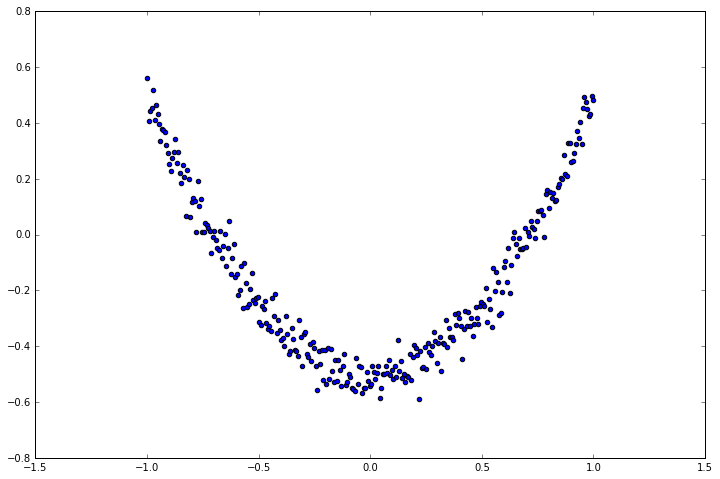

1.34175
0.0120384


In [25]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
def add_layer(inputs, input_size, output_size, activation_function=None):
    Weights = tf.Variable(tf.random_normal([input_size, output_size]))
    biases = tf.Variable(tf.zeros([1,output_size]) + 0.1) #better then be all 0's
    Wx_plus_b = tf.add(tf.matmul(inputs, Weights), biases)
    if activation_function is None:
        output = Wx_plus_b
    else:
        output = activation_function(Wx_plus_b)
    return output


x_data = np.linspace(-1, 1, 300,dtype='float32')[:, np.newaxis] #np.newaxis can be used to increase dimention of ndarray
noise = np.random.normal(0,0.05,x_data.shape)
y_data = np.square(x_data) - 0.5 + noise

xs = tf.placeholder(tf.float32,[None,1]) #None is the size of dataset, 1 is the dimention
ys = tf.placeholder(tf.float32,[None,1]) #same as above
#input dimention = 1, assume hidden layer input = 10,
#hidden layer1:
layer1 = add_layer(xs, 1, 10, activation_function=tf.nn.relu)
#hidden layer2:
layer2 = add_layer(layer1,10, 10, activation_function=tf.nn.relu)
#output layer:
prediction = add_layer(layer2, 10, 1, activation_function=None)
loss = tf.reduce_mean(tf.reduce_sum(tf.square(ys - prediction),reduction_indices=[1]))
optimizer = tf.train.GradientDescentOptimizer(0.1) #learning rate usually < 1
train = optimizer.minimize(loss)
init = tf.initialize_all_variables()

with tf.Session() as sess:
    sess.run(init)
    fig = plt.figure(figsize=[12,8])
    ax = fig.add_subplot(1,1,1)
    ax.scatter(x_data, y_data)
#     plt.ion() #after show it won't stop for python 3.5
    plt.show(block=False) #for python 2.7
    #continue plotting
    for i in range(100):
        sess.run(train,feed_dict={xs: x_data, ys: y_data})
        if i%50==0:
            prediction_value = sess.run(prediction, feed_dict={xs:x_data}) #automatically feed to layer1 command
            try:
                ax.lines.remove(lines[0])
            except Exception:
                pass
            lines = ax.plot(x_data,prediction_value,'r-',lw=5) #lw is width of the line
            plt.pause(0.1)
            print(sess.run(loss,feed_dict={xs:x_data, ys:y_data}))

    

### Tensorflow optimizer
https://www.tensorflow.org/versions/r0.10/api_docs/python/train.html

### Tensorboard visualization of the flow chart of the network

In [27]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
def add_layer(inputs, input_size, output_size, activation_function=None):
    with tf.name_scope('Layer'):
        with tf.name_scope('Weights'):
            Weights = tf.Variable(tf.random_normal([input_size, output_size]), name= "W")
        with tf.name_scope('Biases'):
            biases = tf.Variable(tf.zeros([1,output_size]) + 0.1, name='b') #better then be all 0's
        with tf.name_scope('Wx_plus_b'):
            Wx_plus_b = tf.add(tf.matmul(inputs, Weights), biases)
        if activation_function is None:
            output = Wx_plus_b
        else:
            output = activation_function(Wx_plus_b)
        return output


x_data = np.linspace(-1, 1, 300,dtype='float32')[:, np.newaxis] #np.newaxis can be used to increase dimention of ndarray
noise = np.random.normal(0,0.05,x_data.shape)
y_data = np.square(x_data) - 0.5 + noise

#define placeholder
with tf.name_scope('inputs'): # overall structure
    xs = tf.placeholder(tf.float32,[None,1], name='x_input') #None is the size of dataset, 1 is the dimention
    ys = tf.placeholder(tf.float32,[None,1], name='y_input') #same as above
#input dimention = 1, assume hidden layer input = 10,
#hidden layer1:
layer1 = add_layer(xs, 1, 10, activation_function=tf.nn.relu)
#hidden layer2:
layer2 = add_layer(layer1,10, 10, activation_function=tf.nn.relu)
#output layer:
prediction = add_layer(layer2, 10, 1, activation_function=None)
with tf.name_scope('Loss'):
    loss = tf.reduce_mean(tf.reduce_sum(tf.square(ys - prediction),reduction_indices=[1]))
optimizer = tf.train.GradientDescentOptimizer(0.1) #learning rate usually < 1
with tf.name_scope('Train'):
    train = optimizer.minimize(loss)
init = tf.initialize_all_variables()

with tf.Session() as sess:
    sess.run(init)
    writer = tf.train.SummaryWriter('logs/',sess.graph)
#     fig = plt.figure(figsize=[12,8])
#     ax = fig.add_subplot(1,1,1)
#     ax.scatter(x_data, y_data)
# #     plt.ion() #after show it won't stop for python 3.5
#     plt.show(block=False) #for python 2.7
#     #continue plotting
#     for i in range(500):
#         sess.run(train,feed_dict={xs: x_data, ys: y_data})
#         if i%50==0:
#             prediction_value = sess.run(prediction, feed_dict={xs:x_data}) #automatically feed to layer1 command
#             try:
#                 ax.lines.remove(lines[0])
#             except Exception:
#                 pass
#             lines = ax.plot(x_data,prediction_value,'r-',lw=5) #lw is width of the line
#             plt.pause(0.1)
#             print(sess.run(loss,feed_dict={xs:x_data, ys:y_data}))

    

## Tensorboard adding summary
The kernel may has to be restarted to run the following code. otherwise it will error because of the data

In [28]:
import tensorflow as tf
import numpy as np


def add_layer(inputs, in_size, out_size, n_layer, activation_function=None):
    # add one more layer and return the output of this layer
    layer_name = 'layer%s' % n_layer
    with tf.name_scope(layer_name):
        with tf.name_scope('weights'):
            Weights = tf.Variable(tf.random_normal([in_size, out_size]), name='W')
            tf.histogram_summary(layer_name + '/weights', Weights)
        with tf.name_scope('biases'):
            biases = tf.Variable(tf.zeros([1, out_size]) + 0.1, name='b')
            tf.histogram_summary(layer_name + '/biases', biases)
        with tf.name_scope('Wx_plus_b'):
            Wx_plus_b = tf.add(tf.matmul(inputs, Weights), biases)
        if activation_function is None:
            outputs = Wx_plus_b
        else:
            outputs = activation_function(Wx_plus_b, )
        tf.histogram_summary(layer_name + '/outputs', outputs)
        return outputs


# Make up some real data
x_data = np.linspace(-1, 1, 300,dtype='float32')[:, np.newaxis]
noise = np.random.normal(0, 0.05, x_data.shape)
y_data = np.square(x_data) - 0.5 + noise

# define placeholder for inputs to network
with tf.name_scope('inputs'):
    xs = tf.placeholder(tf.float32, [None, 1], name='x_input')
    ys = tf.placeholder(tf.float32, [None, 1], name='y_input')

# add hidden layer
l1 = add_layer(xs, 1, 10, n_layer=1, activation_function=tf.nn.relu)
# add output layer
prediction = add_layer(l1, 10, 1, n_layer=2, activation_function=None)

# the error between prediciton and real data
with tf.name_scope('loss'):
    loss = tf.reduce_mean(tf.reduce_sum(tf.square(ys - prediction),
                                        reduction_indices=[1]))
    tf.scalar_summary('loss', loss)

with tf.name_scope('train'):
    train_step = tf.train.GradientDescentOptimizer(0.1).minimize(loss)

sess = tf.Session()
merged = tf.merge_all_summaries()
writer = tf.train.SummaryWriter("logs/", sess.graph)
# important step
sess.run(tf.initialize_all_variables())

for i in range(1000):
    sess.run(train_step, feed_dict={xs: x_data, ys: y_data})
    if i % 500 == 0:
        print 'Current step loss is:',sess.run(loss, feed_dict={xs: x_data, ys: y_data})
        result = sess.run(merged,
                          feed_dict={xs: x_data, ys: y_data})
        writer.add_summary(result, i)

Current step loss is: 0.155461
Current step loss is: 0.00261132


## Classify MNIST dataset with fully connected deep neural network

In [31]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
# number 1 to 10 data
mnist = input_data.read_data_sets('MNIST_data', one_hot=True)

def add_layer(inputs, in_size, out_size, activation_function=None,):
    # add one more layer and return the output of this layer
    Weights = tf.Variable(tf.random_normal([in_size, out_size]),dtype='float32')
    biases = tf.Variable(tf.zeros([1, out_size]) + 0.1,dtype='float32')
    Wx_plus_b = tf.matmul(inputs, Weights) + biases
    if activation_function is None:
        outputs = Wx_plus_b
    else:
        outputs = activation_function(Wx_plus_b,)
    return outputs

def compute_accuracy(v_xs, v_ys):
    global prediction
    y_pre = sess.run(prediction, feed_dict={xs: v_xs})
    correct_prediction = tf.equal(tf.argmax(y_pre,1), tf.argmax(v_ys,1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    result = sess.run(accuracy, feed_dict={xs: v_xs, ys: v_ys})
    return result

# define placeholder for inputs to network
xs = tf.placeholder(tf.float32, [None, 784]) # 28x28
ys = tf.placeholder(tf.float32, [None, 10])

# add output layer
prediction = add_layer(xs, 784, 10,  activation_function=tf.nn.softmax)

# the error between prediction and real data
cross_entropy = tf.reduce_mean(-tf.reduce_sum(ys * tf.log(prediction),
                                              reduction_indices=[1]))       # loss
train_step = tf.train.GradientDescentOptimizer(0.5).minimize(cross_entropy)

sess = tf.Session()
# important step
sess.run(tf.initialize_all_variables())

for i in range(5000):
    batch_xs, batch_ys = mnist.train.next_batch(100)
    sess.run(train_step, feed_dict={xs: batch_xs, ys: batch_ys})
    if i % 500 == 0:
        print 'loss at step',i,':',(compute_accuracy(
            mnist.test.images, mnist.test.labels))

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
loss at step 0 : 0.1317
loss at step 500 : 0.858
loss at step 1000 : 0.8763
loss at step 1500 : 0.8873
loss at step 2000 : 0.8935
loss at step 2500 : 0.8981
loss at step 3000 : 0.8961
loss at step 3500 : 0.8988
loss at step 4000 : 0.9039
loss at step 4500 : 0.9023


## Add dropout layer to the network
The kernel may have to be restarted to run the following code. otherwise it will error because of the data

In [12]:
import tensorflow as tf
import numpy as np
from sklearn.datasets import load_digits
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import LabelBinarizer

# load data
digits = load_digits()
X = digits.data
y = digits.target
y = LabelBinarizer().fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3)
X_train = np.float32(X_train)
X_test = np.float32(X_test)
y_train = np.float32(y_train)
y_test = np.float32(y_test)

def add_layer(inputs, in_size, out_size, layer_name, activation_function=None, ):
    # add one more layer and return the output of this layer
    Weights = tf.Variable(tf.random_normal([in_size, out_size]))
    biases = tf.Variable(tf.zeros([1, out_size]) + 0.1)
    Wx_plus_b = tf.matmul(inputs, Weights) + biases
    # Add dropout here
    Wx_plus_b = tf.nn.dropout(Wx_plus_b, keep_prob)
    if activation_function is None:
        outputs = Wx_plus_b
    else:
        outputs = activation_function(Wx_plus_b, )
    tf.histogram_summary(layer_name + '/outputs', outputs)
    return outputs


# define placeholder for inputs to network
keep_prob = tf.placeholder(tf.float32)
xs = tf.placeholder(tf.float32, [None, 64])  # 8x8
ys = tf.placeholder(tf.float32, [None, 10])

# add output layer
l1 = add_layer(xs, 64, 50, 'l1', activation_function=tf.nn.tanh)
prediction = add_layer(l1, 50, 10, 'l2', activation_function=tf.nn.softmax)

# the loss between prediction and real data
cross_entropy = tf.reduce_mean(-tf.reduce_sum(ys * tf.log(prediction),
                                              reduction_indices=[1]))  # loss
tf.scalar_summary('loss', cross_entropy)
train_step = tf.train.GradientDescentOptimizer(0.5).minimize(cross_entropy)

sess = tf.Session()
# merged = tf.merge_all_summaries()

## summary writer goes in here
# train_writer = tf.train.SummaryWriter("logs/train", sess.graph)
# test_writer = tf.train.SummaryWriter("logs/test", sess.graph)

sess.run(tf.initialize_all_variables())

for i in range(5000):
    # here to determine the keeping probability
    sess.run(train_step, feed_dict={xs: X_train, ys: y_train, keep_prob: 0.5})
    if i % 500 == 0:
        # record loss
        train_result = sess.run(train_step,feed_dict={xs: X_train, ys: y_train, keep_prob: 1})
        test_result = sess.run(prediction,feed_dict={xs: X_test, ys: y_test, keep_prob: 1})
        print 'cross_entropy at step',i,':',sess.run(cross_entropy,feed_dict={xs: X_train, ys: y_train, keep_prob: 1})
#         train_writer.add_summary(train_result, i)
#         test_writer.add_summary(test_result, i)

cross_entropy at step 0 : 8.25048
cross_entropy at step 500 : 0.142886
cross_entropy at step 1000 : 0.120431
cross_entropy at step 1500 : 0.109857
cross_entropy at step 2000 : 0.101427
cross_entropy at step 2500 : 0.0935767
cross_entropy at step 3000 : 0.0866756
cross_entropy at step 3500 : 0.0790164
cross_entropy at step 4000 : 0.0740734
cross_entropy at step 4500 : 0.0707337


## Lecture 18, Saver

In [1]:
import tensorflow as tf
import numpy as np
import os

# Save to file
# remember to define the same dtype and shape when restore
W = tf.Variable([[1,2,3],[3,4,5]], dtype=tf.float32, name='weights')
b = tf.Variable([[1,2,3]], dtype=tf.float32, name='biases')

init= tf.initialize_all_variables()

saver = tf.train.Saver()

with tf.Session() as sess:
    sess.run(init)
    directory = 'saver'
    if not os.path.exists(directory):
        os.makedirs(directory)
    save_path = saver.save(sess, "saver/save_net.ckpt")
    print("Save to path: ", save_path)


('Save to path: ', 'saver/save_net.ckpt')


In [1]:
# Restoring variables
# in case it will mess up with other script's variables, restart first and then run restore
import tensorflow as tf
import numpy as np
# Re-define the same shape and same dtype for your variables
W = tf.Variable(np.arange(6).reshape((2, 3)), dtype=tf.float32, name="weights")
b = tf.Variable(np.arange(3).reshape((1, 3)), dtype=tf.float32, name="biases")
# not need init step
restorer = tf.train.Saver()
with tf.Session() as sess:
    restorer.restore(sess, "saver/save_net.ckpt")
    print("weights:", sess.run(W))
    print("biases:", sess.run(b))



('weights:', array([[ 1.,  2.,  3.],
       [ 3.,  4.,  5.]], dtype=float32))
('biases:', array([[ 1.,  2.,  3.]], dtype=float32))


## Construct CNN AlexNet

In [3]:
import tensorflow as tf
import numpy as np
from tensorflow.examples.tutorials.mnist import input_data
# number 1 to 10 data
mnist = input_data.read_data_sets('MNIST_data', one_hot=True)

def compute_accuracy(v_xs, v_ys):
    global prediction
    y_pre = sess.run(prediction, feed_dict={xs: v_xs, keep_prob: 1})
    correct_prediction = tf.equal(tf.argmax(y_pre,1), tf.argmax(v_ys,1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    result = sess.run(accuracy, feed_dict={xs: v_xs, ys: v_ys, keep_prob: 1})
    return result

def weight_variable(shape):
    initial = tf.truncated_normal(shape, stddev=0.1)
    return tf.Variable(initial)

def bias_variable(shape):
    initial = tf.constant(0.1, shape=shape)
    return tf.Variable(initial)

def conv2d(x, W):
    # stride [1, x_movement, y_movement, 1]
    # Must have strides[0] = strides[3] = 1
    return tf.nn.conv2d(x, W, strides=[1, 1, 1, 1], padding='SAME')

def max_pool_2x2(x):
    # stride [1, x_movement, y_movement, 1]
    return tf.nn.max_pool(x, ksize=[1,2,2,1], strides=[1,2,2,1], padding='SAME')

# define placeholder for inputs to network
xs = tf.placeholder(tf.float32, [None, 784]) # 28x28
ys = tf.placeholder(tf.float32, [None, 10])
keep_prob = tf.placeholder(tf.float32)
x_image = tf.reshape(xs, [-1, 28, 28, 1])
# print(x_image.shape)  # [n_samples, 28,28,1]

## conv1 layer ##
W_conv1 = weight_variable([5,5, 1,64]) # patch 5x5, in size 1, out size 32
b_conv1 = bias_variable([64])
h_conv1 = tf.nn.relu(conv2d(x_image, W_conv1) + b_conv1) # output size 28x28x32
h_pool1 = max_pool_2x2(h_conv1)                                         # output size 14x14x32

## conv2 layer ##
W_conv2 = weight_variable([5,5, 64, 128]) # patch 5x5, in size 32, out size 64
b_conv2 = bias_variable([128])
h_conv2 = tf.nn.relu(conv2d(h_pool1, W_conv2) + b_conv2) # output size 14x14x64
h_pool2 = max_pool_2x2(h_conv2)                                         # output size 7x7x64

## func1 layer ##
W_fc1 = weight_variable([7*7*128, 512])
b_fc1 = bias_variable([512])
# [n_samples, 7, 7, 64] ->> [n_samples, 7*7*64]
h_pool2_flat = tf.reshape(h_pool2, [-1, 7*7*128])
h_fc1 = tf.nn.relu(tf.matmul(h_pool2_flat, W_fc1) + b_fc1)
h_fc1_drop = tf.nn.dropout(h_fc1, keep_prob)

## func2 layer ##
W_fc2 = weight_variable([512, 10])
b_fc2 = bias_variable([10])
prediction = tf.nn.softmax(tf.matmul(h_fc1_drop, W_fc2) + b_fc2)


# the error between prediction and real data
cross_entropy = tf.reduce_mean(-tf.reduce_sum(ys * tf.log(prediction),
                                              reduction_indices=[1]))       # loss
train_step = tf.train.AdamOptimizer(1e-4).minimize(cross_entropy)

sess = tf.Session()
# important step
sess.run(tf.initialize_all_variables())

for i in range(1000):
    batch_xs, batch_ys = mnist.train.next_batch(100)
    sess.run(train_step, feed_dict={xs: batch_xs, ys: batch_ys, keep_prob: 0.5})
    if i % 500 == 0:
        print 'accuracy at step',i,':',(compute_accuracy(
            mnist.test.images, mnist.test.labels))

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
accuracy at step 0 : 0.0887
accuracy at step 500 : 0.9528


## Visualize the kernel at each layer (or receiptive field)

(5, 5, 64, 128)


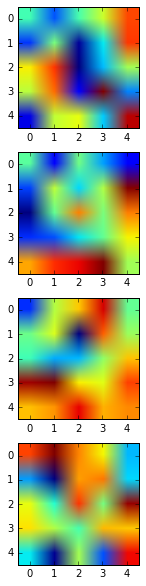

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline
print sess.run(W_conv2).shape
f, axarr = plt.subplots(4,figsize=[10,10])
axarr[0].imshow(sess.run(W_conv2)[:,:,0,0])
axarr[1].imshow(sess.run(W_conv2)[:,:,23,12])
axarr[2].imshow(sess.run(W_conv2)[:,:,41,44])
axarr[3].imshow(sess.run(W_conv2)[:,:,45,55])


## Test with images 
there are many images in the dataset, you can choose one by giving imageIndex a number, the range is depended on how many dataset you have read in

prediction is: 2


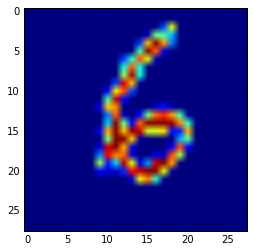

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline
imageIndex = 2000;
x_image = tf.reshape(mnist.test.images, [-1, 28, 28, 1])
img = sess.run(x_image)[imageIndex,:,:,0]
plt.imshow(img)

y_pre = sess.run(prediction, feed_dict={xs: mnist.test.images[:,:], keep_prob: 1})
Nums = [0,1,2,3,4,5,6,7,8,9]

print 'prediction is:',np.where(np.int16(np.round(y_pre[imageIndex,:],0))==1)[0][0]

## Save and restore networks

In [1]:
# Save trained network
import tensorflow as tf
import numpy as np
import os
from tensorflow.examples.tutorials.mnist import input_data
# number 1 to 10 data
mnist = input_data.read_data_sets('MNIST_data', one_hot=True)

def compute_accuracy(v_xs, v_ys):
    global prediction
    y_pre = sess.run(prediction, feed_dict={xs: v_xs, keep_prob: 1})
    correct_prediction = tf.equal(tf.argmax(y_pre,1), tf.argmax(v_ys,1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    result = sess.run(accuracy, feed_dict={xs: v_xs, ys: v_ys, keep_prob: 1})
    return result

def weight_variable(shape):
    initial = tf.truncated_normal(shape, stddev=0.1)
    return tf.Variable(initial)

def bias_variable(shape):
    initial = tf.constant(0.1, shape=shape)
    return tf.Variable(initial)

def conv2d(x, W):
    # stride [1, x_movement, y_movement, 1]
    # Must have strides[0] = strides[3] = 1
    return tf.nn.conv2d(x, W, strides=[1, 1, 1, 1], padding='SAME')

def max_pool_2x2(x):
    # stride [1, x_movement, y_movement, 1]
    return tf.nn.max_pool(x, ksize=[1,2,2,1], strides=[1,2,2,1], padding='SAME')

# define placeholder for inputs to network
xs = tf.placeholder(tf.float32, [None, 784]) # 28x28
ys = tf.placeholder(tf.float32, [None, 10])
keep_prob = tf.placeholder(tf.float32)
x_image = tf.reshape(xs, [-1, 28, 28, 1])
# print(x_image.shape)  # [n_samples, 28,28,1]

## conv1 layer ##
W_conv1 = weight_variable([5,5, 1,64]) # patch 5x5, in size 1, out size 32
b_conv1 = bias_variable([64])
h_conv1 = tf.nn.relu(conv2d(x_image, W_conv1) + b_conv1) # output size 28x28x32
h_pool1 = max_pool_2x2(h_conv1)                                         # output size 14x14x32

## conv2 layer ##
W_conv2 = weight_variable([5,5, 64, 128]) # patch 5x5, in size 32, out size 64
b_conv2 = bias_variable([128])
h_conv2 = tf.nn.relu(conv2d(h_pool1, W_conv2) + b_conv2) # output size 14x14x64
h_pool2 = max_pool_2x2(h_conv2)                                         # output size 7x7x64

## func1 layer ##
W_fc1 = weight_variable([7*7*128, 512])
b_fc1 = bias_variable([512])
# [n_samples, 7, 7, 64] ->> [n_samples, 7*7*64]
h_pool2_flat = tf.reshape(h_pool2, [-1, 7*7*128])
h_fc1 = tf.nn.relu(tf.matmul(h_pool2_flat, W_fc1) + b_fc1)
h_fc1_drop = tf.nn.dropout(h_fc1, keep_prob)

## func2 layer ##
W_fc2 = weight_variable([512, 10])
b_fc2 = bias_variable([10])
prediction = tf.nn.softmax(tf.matmul(h_fc1_drop, W_fc2) + b_fc2)



# the error between prediction and real data
cross_entropy = tf.reduce_mean(-tf.reduce_sum(ys * tf.log(prediction),
                                              reduction_indices=[1]))       # loss
train_step = tf.train.AdamOptimizer(1e-4).minimize(cross_entropy)

sess = tf.Session()
# important step
sess.run(tf.initialize_all_variables())

# initialize saver

for i in range(1000):
    batch_xs, batch_ys = mnist.train.next_batch(100)
    sess.run(train_step, feed_dict={xs: batch_xs, ys: batch_ys, keep_prob: 0.5})
    if i % 500 == 0:
        print(compute_accuracy(
            mnist.test.images, mnist.test.labels))
        
saver = tf.train.Saver() #only save variables
directory = 'saver2'
if not os.path.exists(directory):
    os.makedirs(directory)
filename = directory + 'save_net.ckpt'
save_path = saver.save(sess, filename)
print 'saved'

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
0.111
0.9531
saved


## Restore the net that has been leanred and stored by above script
If you just ran the above code, you have to restart the kernel, because the structure may be confused by variables defined above.

In [1]:
# Restore the network
# If you have ran the above step, and before you run this restore script, you have to restart the kernel
import tensorflow as tf
import numpy as np
from tensorflow.examples.tutorials.mnist import input_data
# number 1 to 10 data
mnist = input_data.read_data_sets('MNIST_data', one_hot=True)

def compute_accuracy(v_xs, v_ys):
    global prediction
    y_pre = sess.run(prediction, feed_dict={xs: v_xs, keep_prob: 1})
    correct_prediction = tf.equal(tf.argmax(y_pre,1), tf.argmax(v_ys,1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    result = sess.run(accuracy, feed_dict={xs: v_xs, ys: v_ys, keep_prob: 1})
    return result

def weight_variable(shape):
    initial = tf.truncated_normal(shape, stddev=0.1)
    return tf.Variable(initial)

def bias_variable(shape):
    initial = tf.constant(0.1, shape=shape)
    return tf.Variable(initial)

def conv2d(x, W):
    # stride [1, x_movement, y_movement, 1]
    # Must have strides[0] = strides[3] = 1
    return tf.nn.conv2d(x, W, strides=[1, 1, 1, 1], padding='SAME')

def max_pool_2x2(x):
    # stride [1, x_movement, y_movement, 1]
    return tf.nn.max_pool(x, ksize=[1,2,2,1], strides=[1,2,2,1], padding='SAME')

# define placeholder for inputs to network
xs = tf.placeholder(tf.float32, [None, 784]) # 28x28
ys = tf.placeholder(tf.float32, [None, 10])
keep_prob = tf.placeholder(tf.float32)
x_image = tf.reshape(xs, [-1, 28, 28, 1])
# print(x_image.shape)  # [n_samples, 28,28,1]

## conv1 layer ##
W_conv1 = weight_variable([5,5, 1,64]) # patch 5x5, in size 1, out size 32
b_conv1 = bias_variable([64])
h_conv1 = tf.nn.relu(conv2d(x_image, W_conv1) + b_conv1) # output size 28x28x32
h_pool1 = max_pool_2x2(h_conv1)                                         # output size 14x14x32

## conv2 layer ##
W_conv2 = weight_variable([5,5, 64, 128]) # patch 5x5, in size 32, out size 64
b_conv2 = bias_variable([128])
h_conv2 = tf.nn.relu(conv2d(h_pool1, W_conv2) + b_conv2) # output size 14x14x64
h_pool2 = max_pool_2x2(h_conv2)                                         # output size 7x7x64

## func1 layer ##
W_fc1 = weight_variable([7*7*128, 512])
b_fc1 = bias_variable([512])
# [n_samples, 7, 7, 64] ->> [n_samples, 7*7*64]
h_pool2_flat = tf.reshape(h_pool2, [-1, 7*7*128])
h_fc1 = tf.nn.relu(tf.matmul(h_pool2_flat, W_fc1) + b_fc1)
h_fc1_drop = tf.nn.dropout(h_fc1, keep_prob)

## func2 layer ##
W_fc2 = weight_variable([512, 10])
b_fc2 = bias_variable([10])
prediction = tf.nn.softmax(tf.matmul(h_fc1_drop, W_fc2) + b_fc2)


# the error between prediction and real data
cross_entropy = tf.reduce_mean(-tf.reduce_sum(ys * tf.log(prediction),
                                              reduction_indices=[1]))       # loss
train_step = tf.train.AdamOptimizer(1e-4).minimize(cross_entropy)

sess = tf.Session()

### When restoring from local file, we dont need to initialize all variables
# sess.run(tf.initialize_all_variables())

### When restoring, we dont need to train at all
# for i in range(1000):
#     batch_xs, batch_ys = mnist.train.next_batch(100)
#     sess.run(train_step, feed_dict={xs: batch_xs, ys: batch_ys, keep_prob: 0.5})
#     if i % 500 == 0:
#         print(compute_accuracy(
#             mnist.test.images, mnist.test.labels))

saver = tf.train.Saver()
sess = tf.Session()
directory = 'saver2'
filename = directory + 'save_net.ckpt'
saver.restore(sess, filename)
print 'Finished Restoring'

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Finished Restoring


prediction is: 5


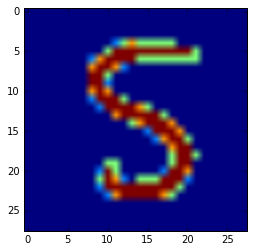

In [3]:
# Testing
# Now test again! It works
import matplotlib.pyplot as plt
%matplotlib inline
imageIndex = 2100;
x_image = tf.reshape(mnist.test.images, [-1, 28, 28, 1])
img = sess.run(x_image)[imageIndex,:,:,0]
plt.imshow(img)
inputImg = mnist.test.images[imageIndex:imageIndex+1,:]
y_pre = sess.run(prediction, feed_dict={xs: inputImg, keep_prob: 1})
Nums = [0,1,2,3,4,5,6,7,8,9]

print 'prediction is:',np.where(np.int16(np.round(y_pre[0,:],0))==1)[0][0]